In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize
import scipy.stats

In [2]:
url = 'https://raw.githubusercontent.com/kavinsrinaath/DSC/master/temP/drug_review.csv'
df = pd.read_csv(url)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,7-May-11,3
1,225257,Bupropion,Depression,"""I was really glad that I experienced none of ...",4,8-Oct-15,0
2,224842,Bupropion,Depression,"""F/26, Wellbutrin SR 100mg twice a day &amp; I...",10,2-Jan-17,14
3,225955,Bupropion,Depression,"""Wellbutrin has significantly improved my over...",8,8-Jun-09,46
4,95811,Sertraline,Depression,"""I was on the sertraline, for 3 years. After d...",6,12-May-14,25


In [3]:
rating_ser = df.rating[df.drugName=='Sertraline']
rating_bup = df.rating[df.drugName=='Bupropion']
print(f'Length of rating_ser : {len(rating_ser)}')
print(f'Length of rating_bup : {len(rating_bup)}')

Length of rating_ser : 663
Length of rating_bup : 747


In [4]:
mean_ser = np.mean(rating_ser)
mean_bup = np.mean(rating_bup)
std_ser = np.std(rating_ser,ddof=1)
std_bup = np.std(rating_bup,ddof=1)
print(f'Mean_ser : {mean_ser}')
print(f'Mean_bup : {mean_bup}')
print(f'Std_ser : {std_ser}')
print(f'Std_bup : {std_bup}')

Mean_ser : 7.14027149321267
Mean_bup : 7.386880856760375
Std_ser : 3.0295510199324003
Std_bup : 2.899383181235341


In [5]:
obs_mean_diff = mean_bup-mean_ser
print(obs_mean_diff)

0.24660936354770513


In [6]:
#H0 : Both drugs have equal recption
#H1 : Reception of Bupropion is greater than Sertraline

#We choose a 95% CI (alpha 0.05) for this particular test.

In [7]:
np.random.seed(42)
bootstrap_ser = [rating_ser.sample(1000,replace=True).mean() for i in range(10000)]
bootstrap_bup = [rating_bup.sample(1000,replace=True).mean() for i in range(10000)]
bootstrap_mean_diff = np.subtract(bootstrap_bup,bootstrap_ser)

In [8]:
pval = np.sum(bootstrap_mean_diff>=obs_mean_diff)/len(bootstrap_mean_diff)
CIs = np.percentile(bootstrap_mean_diff,[2.5,97.5])
upper_limit = round(CIs[1],2)
lower_limit = round(CIs[0],2)

print(f'p-Value : {pval}')
print(f'95 % CIs : {CIs}')

p-Value : 0.4982
95 % CIs : [-0.019025  0.511   ]


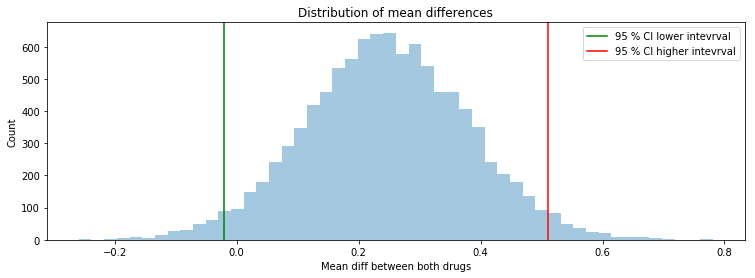

In [9]:
figsize(12.5,4)
sns.distplot(bootstrap_mean_diff,kde=False)
plt.xlabel('Mean diff between both drugs')
plt.ylabel('Count')
plt.title('Distribution of mean differences')
plt.axvline(lower_limit,color='green',label='95 % CI lower intevrval') # lower interval
plt.axvline(upper_limit,color='red',label='95 % CI higher intevrval') # higher interval
plt.legend()

In [10]:
# With p-value of 0.498 we accept the null hypothesis as arrive at the conclusion that both durgs are received equally by its
#users for treatment of depression.

In [11]:
scipy.stats.ttest_ind(rating_ser,rating_bup,equal_var=True)

Ttest_indResult(statistic=-1.5607563248621923, pvalue=0.11880597955715763)

In [14]:
#We now confirm the same witht he t-test as well where the pvalue is greater than the chosen alpha, and thus we accept null hypothesis.

In [ ]:
# Student t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)